# 코로나 데이터  
https://kdx.kr/data/view/25918

코로나 감염자의 추이를 확인하고 사망율의 변화를 살펴보자

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import matplotlib.pyplot as plt

In [2]:
covid_kr = pd.read_csv('../data/covid_korea/Covid19InfState.csv')

데이터를 불러왔으니 간단히 데이터를 살펴보자..

In [3]:
covid_kr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1073 entries, 0 to 1072
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   seq             1073 non-null   int64  
 1   stateDt         1073 non-null   int64  
 2   stateTime       1073 non-null   object 
 3   decideCnt       1071 non-null   float64
 4   clearCnt        690 non-null    float64
 5   examCnt         691 non-null    float64
 6   deathCnt        1036 non-null   float64
 7   careCnt         633 non-null    float64
 8   resutlNegCnt    633 non-null    float64
 9   accExamCnt      691 non-null    float64
 10  accExamCompCnt  633 non-null    float64
 11  accDefRate      633 non-null    float64
 12  createDt        1073 non-null   object 
 13  updateDt        76 non-null     object 
dtypes: float64(9), int64(2), object(3)
memory usage: 117.5+ KB


In [4]:
covid_kr.head(10)

,seq,stateDt,stateTime,decideCnt,clearCnt,examCnt,deathCnt,careCnt,resutlNegCnt,accExamCnt,accExamCompCnt,accDefRate,createDt,updateDt
0,1135,20230118,00:00,29898142.0,NaN,NaN,33057.0,NaN,NaN,NaN,NaN,NaN,2023-01-18 06:08:27.0,NaN
1,1134,20230117,00:00,29861234.0,NaN,NaN,33014.0,NaN,NaN,NaN,NaN,NaN,2023-01-17 03:40:10.0,NaN
2,1133,20230116,00:00,29821035.0,NaN,NaN,32984.0,NaN,NaN,NaN,NaN,NaN,2023-01-16 01:37:44.0,NaN
3,1132,20230115,00:00,29806891.0,NaN,NaN,32949.0,NaN,NaN,NaN,NaN,NaN,2023-01-15 01:16:52.0,2023-01-15 10:03:19.0
4,1130,20230114,00:00,29774321.0,NaN,NaN,32912.0,NaN,NaN,NaN,NaN,NaN,2023-01-14 06:11:49.0,2023-01-14 09:26:34.0
5,1129,20230113,00:00,29737769.0,NaN,NaN,32867.0,NaN,NaN,NaN,NaN,NaN,2023-01-13 05:02:30.0,NaN
6,1128,20230112,00:00,29698043.0,NaN,NaN,32821.0,NaN,NaN,NaN,NaN,NaN,2023-01-12 06:06:08.0,NaN
7,1127,20230111,00:00,29654090.0,NaN,NaN,32745.0,NaN,NaN,NaN,NaN,NaN,2023-01-11 00:50:45.0,NaN
8,1126,20230110,00:00,29599747.0,NaN,NaN,32669.0,NaN,NaN,NaN,NaN,NaN,2023-01-10 06:14:46.0,NaN
9,1125,20230109,00:00,29539706.0,NaN,NaN,32625.0,NaN,NaN,NaN,NaN,NaN,2023-01-09 00:36:55.0,NaN


In [5]:
covid_kr.tail(20)

,seq,stateDt,stateTime,decideCnt,clearCnt,examCnt,deathCnt,careCnt,resutlNegCnt,accExamCnt,accExamCompCnt,accDefRate,createDt,updateDt
1053,20,20200211,16:00,28.0,4.0,762.0,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-11 17:09:25.25,NaN
1054,19,20200211,09:00,28.0,4.0,865.0,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-11 9:50:10.10,NaN
1055,18,20200210,16:00,27.0,3.0,531.0,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-10 17:03:49.49,2020-02-10 19:04:27.27
1056,17,20200210,09:00,27.0,3.0,809.0,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-10 9:56:41.41,NaN
1057,16,20200209,16:00,27.0,3.0,888.0,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-09 16:59:21.21,NaN
1058,15,20200209,09:00,25.0,3.0,960.0,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-09 9:58:22.22,2020-02-09 11:08:56.56
1059,14,20200208,16:00,24.0,2.0,939.0,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-08 17:01:34.34,NaN
1060,13,20200208,16:00,24.0,2.0,939.0,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-08 17:01:12.12,NaN
1061,12,20200208,16:00,24.0,2.0,939.0,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-08 16:48:05.05,NaN
1062,11,20200208,16:00,24.0,2.0,939.0,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-08 16:00:22.22,NaN


tail 데이터를 살펴보니 날자별 중복이 존재한다.   
stateTime 데이터를 살펴보면 검사 결과(?)가 나온 시간데 같은데, 같은 날이라도 시간대가 다르면 다른 데이터라고 봐도 될 것 같다. 그런데 날자와 시간이 모두 같으면 중복이라고 판단할 수 있다. 

날자와 시간 데이터가 같은 것을 제거하자. 

In [6]:
covid_kr.drop_duplicates(['stateDt', 'stateTime'], inplace=True)
covid_kr = covid_kr.reset_index(drop=True)

In [7]:
covid_kr.tail(15)

,seq,stateDt,stateTime,decideCnt,clearCnt,examCnt,deathCnt,careCnt,resutlNegCnt,accExamCnt,accExamCompCnt,accDefRate,createDt,updateDt
1046,18,20200210,16:00,27.0,3.0,531.0,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-10 17:03:49.49,2020-02-10 19:04:27.27
1047,17,20200210,09:00,27.0,3.0,809.0,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-10 9:56:41.41,NaN
1048,16,20200209,16:00,27.0,3.0,888.0,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-09 16:59:21.21,NaN
1049,15,20200209,09:00,25.0,3.0,960.0,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-09 9:58:22.22,2020-02-09 11:08:56.56
1050,14,20200208,16:00,24.0,2.0,939.0,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-08 17:01:34.34,NaN
1051,10,20200208,09:00,24.0,2.0,620.0,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-08 10:09:34.34,NaN
1052,9,20200207,16:00,24.0,2.0,327.0,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-07 17:20:45.45,NaN
1053,8,20200207,09:00,24.0,2.0,264.0,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-07 9:53:27.27,2020-02-07 11:44:30.30
1054,7,20200206,09:00,23.0,1.0,169.0,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-06 9:09:49.49,2020-02-06 10:04:35.35
1055,6,20200205,19:00,19.0,1.0,40.0,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-05 20:05:40.40,2020-02-06 10:05:36.36


날자와 시간이 같은 데이터의 중복을 제거했다.  
이제 info()로 데이터를 살펴보자.

In [8]:
covid_kr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   seq             1061 non-null   int64  
 1   stateDt         1061 non-null   int64  
 2   stateTime       1061 non-null   object 
 3   decideCnt       1059 non-null   float64
 4   clearCnt        678 non-null    float64
 5   examCnt         679 non-null    float64
 6   deathCnt        1028 non-null   float64
 7   careCnt         626 non-null    float64
 8   resutlNegCnt    626 non-null    float64
 9   accExamCnt      684 non-null    float64
 10  accExamCompCnt  626 non-null    float64
 11  accDefRate      626 non-null    float64
 12  createDt        1061 non-null   object 
 13  updateDt        76 non-null     object 
dtypes: float64(9), int64(2), object(3)
memory usage: 116.2+ KB


info()를 통해 살펴보니 1061의 행이 있고, 14개의 열이 있다.  
우리는 이 중에서 확진자 누적 정보(decideCnt)와 누적 사망자 정보(deathCnt)를 사용해 일일 확진자와 사망자 그리고 사망율을 구해보자.

decideCnt와 deathCnt에 null값이 있는 것을 확인할 수 있다. 어떤 행에 Null이 있는지 살펴보자

In [9]:
# deathCnt에 null 값 확인
covid_kr[covid_kr.deathCnt.isnull() == True].head()

,seq,stateDt,stateTime,decideCnt,clearCnt,examCnt,deathCnt,careCnt,resutlNegCnt,accExamCnt,accExamCompCnt,accDefRate,createDt,updateDt
1027,38,20200220,09:00,82.0,16.0,1633.0,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-20 10:01:31.31,NaN
1028,37,20200219,16:00,51.0,16.0,1149.0,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-19 17:00:13.13,NaN
1029,36,20200219,09:00,46.0,12.0,1030.0,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-19 9:53:08.08,NaN
1030,35,20200218,16:00,31.0,12.0,818.0,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-18 16:42:00.00,NaN
1031,34,20200218,09:00,31.0,10.0,957.0,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-18 10:05:31.31,NaN


2020년 2월 20일 이전에는 사망자 정보가 없다는 것을 볼 수 있다. 그럼 이 행을 모두 제거하자

In [10]:
# deathCnt 결측치 제거
covid_kr = covid_kr.iloc[:1027]

In [11]:
# 제거한 결과를 살펴보자
covid_kr[covid_kr.deathCnt.isnull() == True]

,seq,stateDt,stateTime,decideCnt,clearCnt,examCnt,deathCnt,careCnt,resutlNegCnt,accExamCnt,accExamCompCnt,accDefRate,createDt,updateDt


없는 것을 확인했다. 이제는 decideCnt 결측치 2개를 확인해보자

In [12]:
covid_kr[covid_kr.decideCnt.isnull()==True]

,seq,stateDt,stateTime,decideCnt,clearCnt,examCnt,deathCnt,careCnt,resutlNegCnt,accExamCnt,accExamCompCnt,accDefRate,createDt,updateDt


결측치가 사라진 것을 보니 deathCnt와 중복된 결측치가 있었던 것 같다.   
결측치를 제거했으니 데이터 손질을 시작하자. 

사용할 데이터는 날자, 누적확진자수, 누적사망자수 이므로 이 세 데이터만 가져와서 세로운 DateFrame을 만들자

In [13]:
# 손질 전 데이터 갯수
len(covid_kr.iloc[:])

1027

In [14]:
covid_dtdc = pd.DataFrame()

In [15]:
covid_dtdc = covid_kr.groupby('stateDt')[['decideCnt', 'deathCnt']].sum()

In [16]:
covid_dtdc.head(20)

,decideCnt,deathCnt
stateDt,,
20200220,104.0,1.0
20200221,360.0,2.0
20200222,779.0,4.0
20200223,1158.0,9.0
20200224,1596.0,14.0
20200225,1870.0,18.0
20200226,2407.0,23.0
20200227,3361.0,25.0
20200228,4359.0,26.0


In [17]:
# 손질 후 데이터 갯수
len(covid_dtdc.iloc[:])

1017

In [18]:
covid_dtdc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017 entries, 20200220 to 20230118
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   decideCnt  1017 non-null   float64
 1   deathCnt   1017 non-null   float64
dtypes: float64(2)
memory usage: 23.8 KB


누적 데이터를 차분해서 일별 신규 데이터를 얻자. 


In [19]:
covid_dtdc['newDecideCnt'] = covid_dtdc['decideCnt'].diff(1)
covid_dtdc['newDeathCnt'] = covid_dtdc['deathCnt'].diff(1)

In [20]:
covid_dtdc.head()

,decideCnt,deathCnt,newDecideCnt,newDeathCnt
stateDt,,,,
20200220,104.0,1.0,NaN,NaN
20200221,360.0,2.0,256.0,1.0
20200222,779.0,4.0,419.0,2.0
20200223,1158.0,9.0,379.0,5.0
20200224,1596.0,14.0,438.0,5.0


차분한 데이터이므로 첫날은 값이 없다. 이 값을 decideCnt와 deathCnt로 넣자

In [42]:
covid_dtdc.loc[20200220, 'newDecideCnt'] = covid_dtdc.loc[20200220, 'decideCnt']

In [43]:
covid_dtdc.loc[20200220, 'newDeathCnt'] = covid_dtdc.loc[20200220, 'deathCnt']

In [44]:
covid_dtdc.head()

,decideCnt,deathCnt,newDecideCnt,newDeathCnt
stateDt,,,,
20200220,104.0,1.0,104.0,1.0
20200221,360.0,2.0,256.0,1.0
20200222,779.0,4.0,419.0,2.0
20200223,1158.0,9.0,379.0,5.0
20200224,1596.0,14.0,438.0,5.0


In [45]:
covid_dtdc['deathRate'] = round(covid_dtdc.newDeathCnt.div(covid_dtdc.newDecideCnt) * 100, 2)

<AxesSubplot:xlabel='stateDt'>

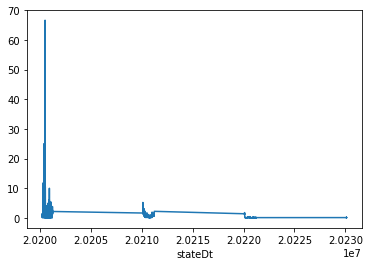

In [49]:
covid_dtdc.deathRate.plot()

위 그래프를 보면 초반에 사망율이 크게 치솟는 것을 볼 수 있다.  
코로나의 국내 평균 사망율은 1% 미만으로 알려져있는데 높은 수치로 치솟는게 이상하다.  
사망율이 치솟는 구간을 살펴보자.

In [69]:
covid_dtdc[covid_dtdc['deathRate'] > 10]

,stateDt,decideCnt,deathCnt,newDecideCnt,newDeathCnt,deathRate
32,20200323,8961.0,111.0,64.0,7.0,10.94
33,20200324,9037.0,120.0,76.0,9.0,11.84
47,20200407,10331.0,192.0,47.0,6.0,12.77
48,20200408,10384.0,200.0,53.0,8.0,15.09
49,20200409,10423.0,204.0,39.0,4.0,10.26
50,20200410,10450.0,208.0,27.0,4.0,14.81
53,20200413,10537.0,217.0,25.0,3.0,12.00
54,20200414,10564.0,222.0,27.0,5.0,18.52
55,20200415,10591.0,225.0,27.0,3.0,11.11
56,20200416,10613.0,229.0,22.0,4.0,18.18


코로나 사망율이 치솟는 구간을 보면 신규 확진자 수가 급격히 감소함을 확인할 수 있다.  
사망율을 구하는 방법을 일별 기준으로 사망자/확진자로 계산하는 바람에 생긴 오류라고 보여진다.

어떻게 해결할 수 있을까..

In [50]:
covid_dtdc.reset_index(inplace=True)

In [51]:
covid_dtdc.head()

,stateDt,decideCnt,deathCnt,newDecideCnt,newDeathCnt,deathRate
0,20200220,104.0,1.0,104.0,1.0,0.96
1,20200221,360.0,2.0,256.0,1.0,0.39
2,20200222,779.0,4.0,419.0,2.0,0.48
3,20200223,1158.0,9.0,379.0,5.0,1.32
4,20200224,1596.0,14.0,438.0,5.0,1.14


In [61]:
temp=covid_dtdc[(covid_dtdc['stateDt'] >20200401) & (covid_dtdc['stateDt'] < 20200631)]
temp

,stateDt,decideCnt,deathCnt,newDecideCnt,newDeathCnt,deathRate
42,20200402,9976.0,169.0,89.0,4.0,4.49
43,20200403,10062.0,174.0,86.0,5.0,5.81
44,20200404,10156.0,177.0,94.0,3.0,3.19
45,20200405,10237.0,183.0,81.0,6.0,7.41
46,20200406,10284.0,186.0,47.0,3.0,6.38
47,20200407,10331.0,192.0,47.0,6.0,12.77
48,20200408,10384.0,200.0,53.0,8.0,15.09
49,20200409,10423.0,204.0,39.0,4.0,10.26
50,20200410,10450.0,208.0,27.0,4.0,14.81
51,20200411,10480.0,211.0,30.0,3.0,10.00


<AxesSubplot:>

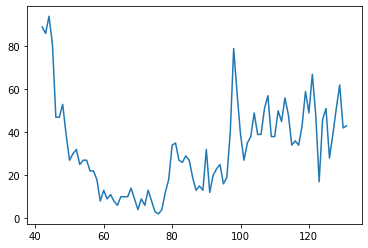

In [62]:
temp['newDecideCnt'].plot()